# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Tajbakhsh

Student name: Golnaz
    
ID: 206508

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID =2014329 # place a random seed
np.random.seed(ID)

In [5]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [6]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [63 63 60 58 61 77 55 60 57 46]


In [7]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


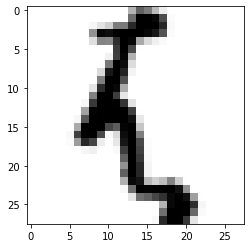

LABEL: 5
INPUT:


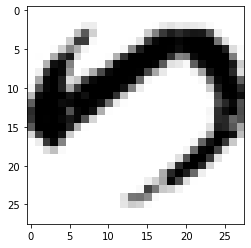

LABEL: 3
INPUT:


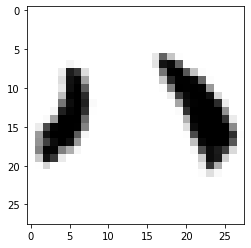

LABEL: 5
INPUT:


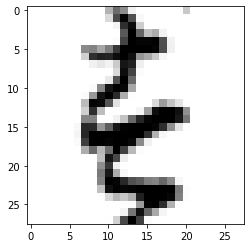

LABEL: 2


In [8]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1, 10]}

#train linear SVM
folds = KFold(n_splits = 4, shuffle = True, random_state = 10)
classifier = SVC(kernel='linear',gamma='auto')
model_cv = GridSearchCV(estimator = classifier,param_grid = parameters, scoring= 'accuracy', cv = folds, verbose = 1,
                        return_train_score=True)

model_cv.fit(X_train, y_train)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

best_score = model_cv.best_score_
best_params = model_cv.best_params_
print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:",best_params)
# ADD YOUR CODE

print("Score with best parameters:",best_score)
# ADD YOUR CODE

print("All scores on the grid:",cv_results)
# ADD YOUR CODE
model = SVC(C=0.1,gamma='auto',kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\naccuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print("confusion_matrix:\n",metrics.confusion_matrix(y_test, y_pred), "\n")

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    5.4s finished


RESULTS FOR LINEAR KERNEL
Best parameters set found: {'C': 0.1}
Score with best parameters: 0.7483333333333333
All scores on the grid:    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.164464      0.003914         0.045129        0.001087    0.01   
1       0.170171      0.003974         0.046370        0.002691     0.1   
2       0.164402      0.002258         0.043634        0.000437       1   
3       0.163381      0.002393         0.044629        0.000431      10   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.693333           0.746667           0.766667   
1   {'C': 0.1}           0.693333           0.726667           0.786667   
2     {'C': 1}           0.693333           0.726667           0.786667   
3    {'C': 10}           0.693333           0.726667           0.786667   

   split3_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.766667         0.743333  

## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters2 = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel
classifier2 = SVC(kernel='poly',degree=2)
model_cv2 = GridSearchCV(estimator = classifier2,param_grid = parameters2, scoring= 'accuracy', cv = folds, verbose = 1,
                        return_train_score=True)  

# ADD YOUR CODE
model_cv2.fit(X_train, y_train)
cv_results2 = pd.DataFrame(model_cv2.cv_results_)
cv_results2

best_score2 = model_cv2.best_score_
best_params2 = model_cv2.best_params_
print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:",best_params2)
# ADD YOUR CODE

print("Score with best parameters:",best_score2)
# ADD YOUR CODE

print("\nAll scores on the grid:",cv_results2)
# ADD YOUR CODE

model2 = SVC(C=0.1,gamma= 0.1,kernel='poly',degree=2)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print("\naccuracy", metrics.accuracy_score(y_test, y_pred2), "\n")
print("confusion_matrix:\n",metrics.confusion_matrix(y_test, y_pred2), "\n")


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   14.6s finished


RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found: {'C': 0.1, 'gamma': 0.1}
Score with best parameters: 0.7716666666666666

All scores on the grid:    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.270277      0.003610         0.050615        0.001296    0.01   
1       0.210266      0.002889         0.044630        0.000431    0.01   
2       0.222433      0.004394         0.042884        0.000701    0.01   
3       0.248372      0.002578         0.049119        0.001087     0.1   
4       0.219914      0.004541         0.042638        0.000433     0.1   
5       0.226877      0.006824         0.045380        0.002058     0.1   
6       0.208606      0.002106         0.045379        0.001114       1   
7       0.221577      0.004424         0.042982        0.001103       1   
8       0.222658      0.005903         0.044148        0.001642       1   

  param_gamma                      params  split0_test_score  \
0        0.01  {'C': 0.01, '

## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters3 = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 3

classifier3 = SVC(kernel='poly',degree=3)
model_cv3 = GridSearchCV(estimator = classifier3,param_grid = parameters3, scoring= 'accuracy', cv = folds, verbose = 1,
                        return_train_score=True)  

# ADD YOUR CODE
model_cv3.fit(X_train, y_train)
cv_results3 = pd.DataFrame(model_cv3.cv_results_)
cv_results3

best_score3 = model_cv3.best_score_
best_params3 = model_cv3.best_params_
# ADD YOUR CODE

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:",best_params3)
# ADD YOUR CODE

print("Score with best parameters:",best_score3)
# ADD YOUR CODE

print("\nAll scores on the grid:",cv_results3)
# ADD YOUR CODE
model3 = SVC(C=0.01,gamma= 0.1,kernel='poly',degree=3)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print("\naccuracy", metrics.accuracy_score(y_test, y_pred3), "\n")
print("confusion_matrix:\n",metrics.confusion_matrix(y_test, y_pred3), "\n")

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   15.1s finished


RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found: {'C': 0.01, 'gamma': 0.1}
Score with best parameters: 0.7066666666666666

All scores on the grid:    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.273289      0.005348         0.052134        0.001748    0.01   
1       0.240865      0.005151         0.044591        0.001711    0.01   
2       0.236995      0.003792         0.042636        0.000432    0.01   
3       0.254081      0.007116         0.048682        0.000773     0.1   
4       0.238548      0.003009         0.042706        0.000464     0.1   
5       0.238155      0.001947         0.042640        0.000434     0.1   
6       0.231922      0.001461         0.044649        0.000442       1   
7       0.238619      0.002856         0.042885        0.000001       1   
8       0.238378      0.002229         0.042885        0.000706       1   

  param_gamma                      params  split0_test_score  \
0        0.01  {'C': 0.01

## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters4 = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel
classifier4 = SVC(kernel='rbf')
model_cv4 = GridSearchCV(estimator = classifier4,param_grid = parameters4, scoring= 'accuracy', cv = folds, verbose = 1,
                        return_train_score=True)  
# ADD YOUR CODE
model_cv4.fit(X_train, y_train)
cv_results4 = pd.DataFrame(model_cv4.cv_results_)


best_score4 = model_cv4.best_score_
best_params4 = model_cv4.best_params_
print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:",best_params4)
# ADD YOUR CODE

print("Score with best parameters:",best_score4)
# ADD YOUR CODE

print("\nAll scores on the grid:",cv_results4)
# ADD YOUR CODE
model4 = SVC(C=10,gamma= 0.01,kernel='rbf')
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print("\naccuracy", metrics.accuracy_score(y_test, y_pred4), "\n")
print("confusion_matrix:\n",metrics.confusion_matrix(y_test, y_pred4), "\n")

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:   29.7s finished


RESULTS FOR rbf KERNEL
Best parameters set found: {'C': 10, 'gamma': 0.01}
Score with best parameters: 0.7983333333333333

All scores on the grid:     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.275130      0.002547         0.050878    7.164833e-04     0.1   
1        0.273786      0.000829         0.051587    1.436409e-03     0.1   
2        0.295897      0.005150         0.051872    1.882621e-03     0.1   
3        0.287798      0.000400         0.051114    4.328545e-04     0.1   
4        0.240125      0.002250         0.050393    4.734922e-04       1   
5        0.263836      0.001758         0.048710    4.778100e-04       1   
6        0.289493      0.000439         0.050364    4.990201e-04       1   
7        0.286089      0.001404         0.050507    6.714162e-04       1   
8        0.170793      0.002272         0.045379    4.987121e-04      10   
9        0.269551      0.001501         0.048121    4.319490e-04      10   
10       0.288986

## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

RBF kernel has the best score among all kernels, the second best score belongs to the linear kernel and then polynomial kernel with dgree 2 and after that polynomial kernel with degree 4.

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
Sc_tr = model.score(X_train, y_train)
Sc_te = model.score(X_test, y_test)
print('Best score for the linear svm for train data:',Sc_tr)
print('Best score for the linear svm for test data:',Sc_te)

Sc_tr2 = model2.score(X_train, y_train)
Sc_te2 = model2.score(X_test, y_test)
print('Best score for the polynomial svm with degree 2 for train data:',Sc_tr2)
print('Best score for the polynomial svm with degree 2 for test data:',Sc_te2)

Sc_tr3 = model3.score(X_train, y_train)
Sc_te3 = model3.score(X_test, y_test)
print('Best score for the polynomial svm with degree 4 for train data:',Sc_tr3)
print('Best score for the polynomial svm with degree 4 for test data:',Sc_te3)

Sc_tr4 = model4.score(X_train, y_train)
Sc_te4 = model4.score(X_test, y_test)
print('Best score for the rbf svm for train data:',Sc_tr4)
print('Best score for the rbf svm for test data:',Sc_te4)
# best_SVM = # USE YOUR OPTIMAL PARAMETERS
best_SVM_train = max(Sc_tr,Sc_tr2,Sc_tr3,Sc_tr4)
best_SVM_test = max(Sc_te,Sc_te2,Sc_te3,Sc_te4)

# (error is 1 - svm.score)
training_error = 1-best_SVM_train
test_error = 1-best_SVM_test
print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best score for the linear svm for train data: 1.0
Best score for the linear svm for test data: 0.75125
Best score for the polynomial svm with degree 2 for train data: 0.995
Best score for the polynomial svm with degree 2 for test data: 0.77425
Best score for the polynomial svm with degree 4 for train data: 0.99
Best score for the polynomial svm with degree 4 for test data: 0.717
Best score for the rbf svm for train data: 1.0
Best score for the rbf svm for test data: 0.82225
Best SVM training error: 0.000000
Best SVM test error: 0.177750


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [13]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


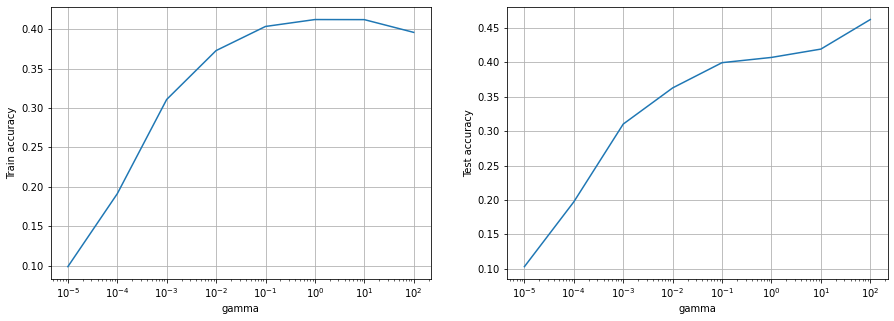

In [31]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42)
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

pca = PCA(n_components=2)
scaler = StandardScaler()
X_train2 = pca.fit_transform(X_train2)
X_test2 = pca.transform(X_test2)
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)



train_acc_list, test_acc_list = [], []

for gamma in gamma_values:
    # ADD CODE TO TRAIN SVM (use the PCA reduced data)
   

    my_model1 = SVC(C=1, gamma = gamma, kernel='rbf')
    my_model1.fit(X_train2,y_train2)
    my_model1.fit(X_test2,y_test2)
    train_acc_list.append(my_model1.score(X_train2,y_train2))
    test_acc_list.append(my_model1.score(X_test2,y_test2))
    
    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

gamma=10 has the best value , for gamma greater that 10 there is overfitting.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [9]:
X_ = X[permutation]
y_ = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train_, X_test_ = X_[:m_training], X_[m_training:]
y_train_, y_test_ = y_[:m_training], y_[m_training:]

labels, freqs = np.unique(y_train_, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [190 195 230 201 209 174 205 190 194 212]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [16]:
#get training and test error for the best SVM model from CV

# ADD YOUR CODE
C_list_ = [0.1, 1, 10, 100]
gamma_ = [0.001, 0.01, 0.1,1]
for C in C_list_:
    for gamma in gamma_:
        my_model_ = SVC(C=C, gamma = gamma, kernel='rbf')
        my_model_.fit(X_train_,y_train_)
        print('Training data, C={:.0e},gamma={:.0e}, model accuracy={:.3f}'.format(my_model_.__dict__['C'],my_model_.__dict__['gamma'],my_model_.score(X_train_,y_train_)))
        print('Test data, C={:.0e},gamma={:.0e}, model accuracy={:.3f}'.format(my_model_.__dict__['C'],my_model_.__dict__['gamma'],my_model_.score(X_test_,y_test_)))
    

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Training data, C=1e-01,gamma=1e-03, model accuracy=0.300
Test data, C=1e-01,gamma=1e-03, model accuracy=0.282
Training data, C=1e-01,gamma=1e-02, model accuracy=0.744
Test data, C=1e-01,gamma=1e-02, model accuracy=0.722
Training data, C=1e-01,gamma=1e-01, model accuracy=0.115
Test data, C=1e-01,gamma=1e-01, model accuracy=0.099
Training data, C=1e-01,gamma=1e+00, model accuracy=0.115
Test data, C=1e-01,gamma=1e+00, model accuracy=0.099
Training data, C=1e+00,gamma=1e-03, model accuracy=0.784
Test data, C=1e+00,gamma=1e-03, model accuracy=0.766
Training data, C=1e+00,gamma=1e-02, model accuracy=0.972
Test data, C=1e+00,gamma=1e-02, model accuracy=0.873
Training data, C=1e+00,gamma=1e-01, model accuracy=1.000
Test data, C=1e+00,gamma=1e-01, model accuracy=0.191
Training data, C=1e+00,gamma=1e+00, model accuracy=1.000
Test data, C=1e+00,gamma=1e+00, model accuracy=0.099
Training data, C=1e+01,gamma=1e-03, model accuracy=0.930
Test data, C=1e+01,gamma=1e-03, model accuracy=0.830
Training d

Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [33]:
from sklearn import linear_model
model8 = linear_model.LogisticRegression(C=100000)
model8.fit(X_train_, y_train_)
prediction = model.predict(X_test_)
score8_tr = model8.score(X_train_, y_train_)
score8_te = model8.score(X_test_, y_test_)
training_error8 = 1-score8_tr
test_error8 = 1-score8_te

# ADD YOUR CODE

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.177750


## TO DO 9 Try  with regularization (use C=1)¶

In [34]:
# ADD YOUR CODE
from sklearn import linear_model
model9 = linear_model.LogisticRegression()
model9.fit(X_train_, y_train_)
prediction = model9.predict(X_test_)
score9_tr = model9.score(X_train_, y_train_)
score9_te = model9.score(X_test_, y_test_)
training_error9 = 1-score9_tr
test_error9 = 1-score9_te
print ("Best regularized logistic regression training error: %f" % training_error9)
print ("Best regularized logistic regression test error: %f" % test_error9)

Best regularized logistic regression training error: 0.002000
Best regularized logistic regression test error: 0.250586


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.

SVM with m=2000 training data points has better result than m=600 training data points because we have more training data so our results are better. But we do not need that much data because it gets more time to run and the results will not change a lot.


- the results of SVM and of Logistic Regression

The results of SVM with RBF kernel is better than Logistic Regression.

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


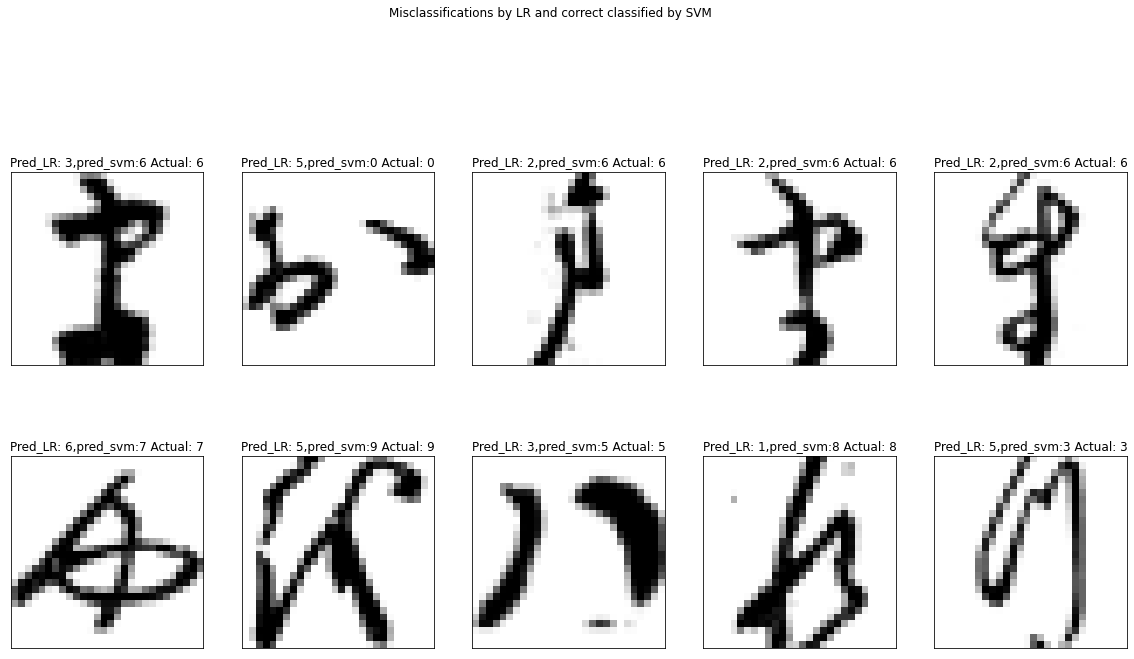

In [11]:
from sklearn.svm import SVC
from sklearn import linear_model
model11 = linear_model.LogisticRegression()
model11.fit(X_train, y_train)
LR_prediction = model11.predict(X_test)

model11_svm = SVC(C=10,gamma= 0.01,kernel='rbf')
model11_svm.fit(X_train, y_train)
SVM_prediction = model11_svm.predict(X_test)

index = 0
misclassified_images = []
for label, predict_LR,predict_SVM in zip(y_test, LR_prediction,SVM_prediction):
    if (label != predict_LR)and (label==predict_SVM): 
        misclassified_images.append(index)
    index +=1
#print(misclassified_images)
plt.figure(figsize=(20,20))
plt.suptitle('Misclassifications by LR and correct classified by SVM');

for plot_index, bad_index in enumerate(misclassified_images[0:10]):
    p = plt.subplot(4,5, plot_index+1) # 4x5 plot
    p.imshow(
        X_test[bad_index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    p.set_xticks(()); p.set_yticks(()) # remove ticks
    
    p.set_title(f'Pred_LR: {LR_prediction[bad_index]},pred_svm:{SVM_prediction[bad_index]} Actual: {y_test[bad_index]}')
    

# ADD CODE

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [12]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

best_model12 = SVC(C=10, gamma = 1e-02, kernel='rbf')
best_model12.fit(X_train,y_train)
y_pred12 = best_model12.predict(X_test)
confusion_SVM = metrics.confusion_matrix(y_test, y_pred12)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

model_svm = linear_model.LogisticRegression()
model_svm.fit(X_train, y_train)
prediction12 = model_svm.predict(X_test)
confusion_LR =  metrics.confusion_matrix(y_test, prediction12)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [388 415 358 405 373 422 407 436 403 393]

 Confusion matrix SVM  
 
 [[339   2   0   2   4   9   1  11  16   4]
 [  0 337  11   3  20   4   8   1  15  16]
 [  0  17 240  15   5   2  50   1  24   4]
 [  2  17   3 343   1  11   3   5  19   1]
 [ 19  13   7  17 275   5   7   4   8  18]
 [  4   9  11  10   1 374   4   3   6   0]
 [  4  17  23   5  18   4 320   4  10   2]
 [  4   5   3  11   7   1   4 384   6  11]
 [  1  12  12   0   4   5  18   0 350   1]
 [  0  18  10   1  13   1   0   4  19 327]]

 Confusion matrix SVM (normalized)   
 
 [[0.87 0.01 0.   0.01 0.01 0.02 0.   0.03 0.04 0.01]
 [0.   0.81 0.03 0.01 0.05 0.01 0.02 0.   0.04 0.04]
 [0.   0.05 0.67 0.04 0.01 0.01 0.14 0.   0.07 0.01]
 [0.   0.04 0.01 0.85 0.   0.03 0.01 0.01 0.05 0.  ]
 [0.05 0.03 0.02 0.05 0.74 0.01 0.02 0.01 0.02 0.05]
 [0.01 0.02 0.03 0.02 0.   0.89 0.01 0.01 0.01 0.  ]
 [0.01 0.04 0.06 0.01 0.04 0.01 0.79 0.01 0.02 0.  ]
 [0.01 0.01 0.01 0.03 0.02 0.   0.01 0.88 0.01 0.

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX


## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.

The diagonal has higher accuracies. This is because the diagonal contains the correctly classified samples, while the other cells correspond to errors.
